## Introduction

Ja se ve plots simples e como sacar info do yfinance. tambem como converter os datasets que vem estranhos e assim.

To get the dataset, we use yahoo finance module **yfinance** to extract the corresponding dataset, from 2010 to the end of 2023.

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [6]:
df = yf.download('TSLA', start='2010-01-01', end='2023-12-31')
df.to_csv('sp500_data.csv')
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [7]:
df.columns

MultiIndex([('Adj Close', 'TSLA'),
            (    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

The dataset has a different format than usual, however since the ticker is always the same, we can convert into a normal dataframe.


Ticker - empresa / id do stock (apple -> AAPL)


Dataset was only downloaded to represent Tesla data -> predicts only Tesla stocks

In [8]:
df.columns = df.columns.droplevel('Ticker') # run only once
df.columns = df.columns.rename(None) # drop price as a label
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [9]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

**In this dataset, the date is the index.** We will remove the hours, since they are not relevant to establish a chronological order.

In [10]:
df.index = pd.to_datetime(df.index).date

df.head()

,Adj Close,Close,High,Low,Open,Volume
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


Closing price -> stocks are open from 9 to 17h. The opening price is relative to 9am and closing price is for 5pm.

We only need closing prices, as the opening prices of 1 day are usually the same as the closing prices of the previous day.

We can map the price flutuations throughout the years, to evaluate the closing price evolution. By default we will use the whole training dataset timeline (13y), but they can be defined as arguments.

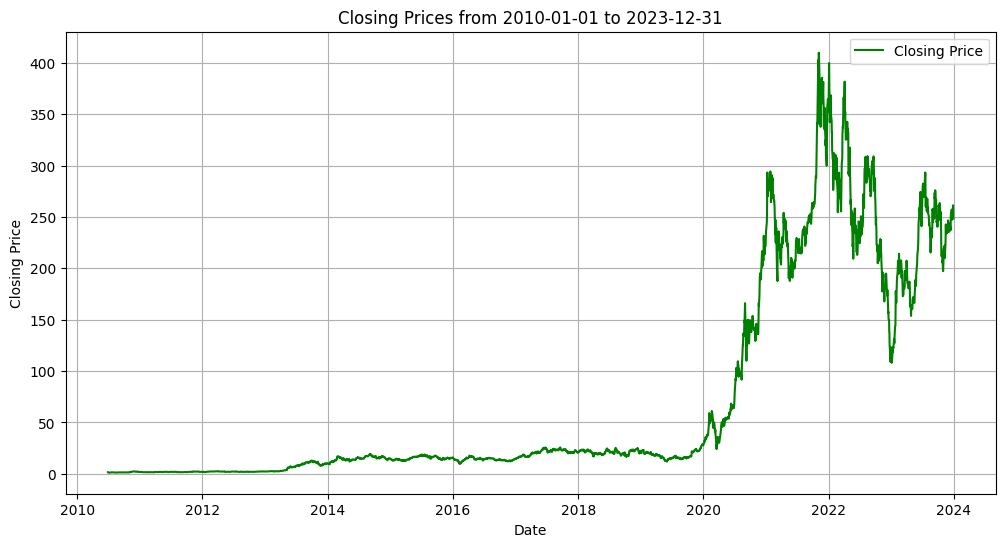

In [11]:
def plot_closing_prices(df, start_date='2010-01-01', end_date='2023-12-31'):
    
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    
    if df.index.dtype == 'O' or df.index.dtype == 'datetime64[ns]':
        df.index = pd.to_datetime(df.index)

    df_filtered = df.loc[start_date:end_date] # subset containing the interval of the requested dates
    

    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered.index, df_filtered['Close'], label='Closing Price', color='green')
    
    plt.title(f'Closing Prices from {start_date.date()} to {end_date.date()}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    
    
    plt.show()

plot_closing_prices(df)
# plot_closing_prices(df,'2010-01-04', '2010-01-07') # to the user change accordingly

In [12]:
df.describe()
# can be useful for EDA and plotting in EDA as well

,Adj Close,Close,High,Low,Open,Volume
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3.400000e+03
mean,70.474242,70.474242,72.048393,68.819973,70.493993,9.681167e+07
std,101.480831,101.480831,103.824949,99.066386,101.559061,8.004848e+07
min,1.053333,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,10.779833,10.779833,11.014167,10.417333,10.722500,4.598775e+07
50%,16.928666,16.928666,17.218667,16.679334,16.944000,8.122500e+07
75%,108.349998,108.349998,111.962500,104.220999,109.584000,1.235249e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08


### Very pertinent note, can be useful to individual stocks

- **Close:** This is the **final price of the stock** at the end of the trading day, representing the actual last transaction price on that day.

- **Adjusted Close:** This price **adjusts the closing price to account for events** that affect the stock's value, like dividends, stock splits, and other corporate actions. Adjustments make it easier to compare historical prices accurately, as they reflect the stock’s true, adjusted value over time.

In this dataset, CONTAINING ONLY THE S&P500 values, they are always the same, however deixo aqui para referencia futura.

In [112]:
# Define tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN'] 

# Define start and end date for data
start = '2010-01-01'
end = '2023-12-31'

# Initialize an empty DataFrame to store data
top4_df = pd.DataFrame()

# Fetch data for each ticker and store the 'Adj Close' in the DataFrame
for ticker in tickers:
    df1 = yf.download(ticker, start=start, end=end)
    top4_df[ticker] = df1['Adj Close']

top4_df.index = pd.to_datetime(df.index).date
top4_df.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOGL,AMZN
2010-01-04,6.447412,23.347324,15.645692,6.6950
2010-01-05,6.458559,23.354866,15.576794,6.7345
2010-01-06,6.355827,23.211538,15.184123,6.6125
2010-01-07,6.344079,22.970140,14.830644,6.5000
2010-01-08,6.386255,23.128555,15.028353,6.6760


As shown below, we can see a general tendency of the curves of these stocks being aligned witht the tendency of S&P500.

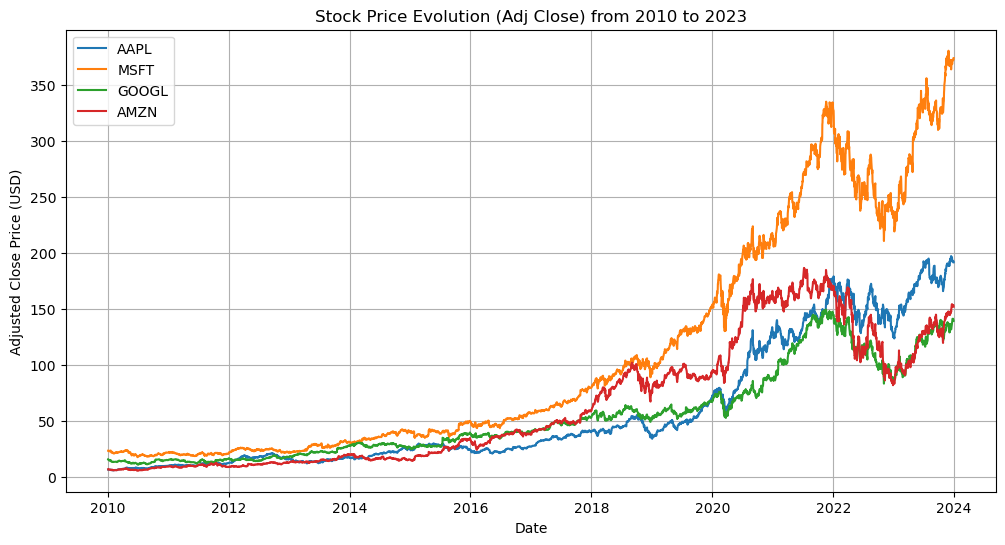

In [113]:
plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(top4_df.index, top4_df[ticker], label=ticker)

# Add title and labels
plt.title('Stock Price Evolution (Adj Close) from 2010 to 2023')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## LSTM

LSTM based model development using keras and sk.learn for metric evaluation.

In [114]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


import warnings
warnings.filterwarnings('ignore')

### Train Test Split

Contrary to what is "the normal procedure", the train-test split phase is handled in a different way. Instead of randomly choosing some days of the sample, we will train the model based on 2010-2023 data, and testing the performance on the beggining of the dataset.

Voltamos ao multi-index format, mas e oq e.

In [115]:
start_train = '2010-01-01'
end_train = '2023-12-31'

trainingData = yf.download('^GSPC', start=start_train, end=end_train)
# vou importar outra vez por uma questao de ser mais facil
# do que simplesmente escolher o subset mas depois muda-se isto tb nao ta organizado nao e mesmo :)
trainingData.head() # voltamos ao formato estranho

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2010-01-04 00:00:00+00:00,1132.989990,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05 00:00:00+00:00,1136.520020,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06 00:00:00+00:00,1137.140015,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07 00:00:00+00:00,1141.689941,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08 00:00:00+00:00,1144.979980,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


In [116]:
end_test = '2024-01-31'
start_test = '2024-01-1'

testingData = yf.download('^GSPC', start=start_test, end=end_test)
testingData.head() 

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2024-01-02 00:00:00+00:00,4742.830078,4742.830078,4754.330078,4722.669922,4745.200195,3743050000
2024-01-03 00:00:00+00:00,4704.810059,4704.810059,4729.290039,4699.709961,4725.069824,3950760000
2024-01-04 00:00:00+00:00,4688.680176,4688.680176,4726.779785,4687.529785,4697.419922,3715480000
2024-01-05 00:00:00+00:00,4697.240234,4697.240234,4721.490234,4682.109863,4690.569824,3844370000
2024-01-08 00:00:00+00:00,4763.540039,4763.540039,4764.540039,4699.819824,4703.700195,3742320000


The prediction task will be ran on the Adjusted Price (definitions above).

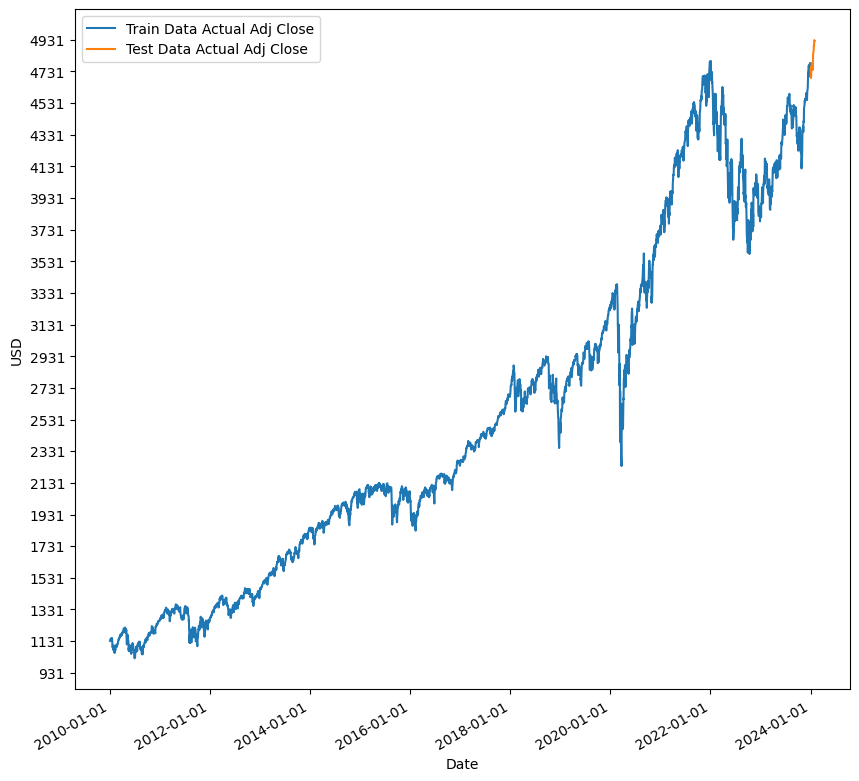

In [117]:
plt.figure(figsize=(10,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().yaxis.set_major_locator(mdates.DayLocator(interval=200))

plt.plot(trainingData.index, trainingData['Adj Close'], label='Train Data Actual Adj Close')
plt.plot(testingData.index, testingData['Adj Close'], label='Test Data Actual Adj Close')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


Focusing/zooming more on the end of the graph, we get:

Nao consigo dar fix daquele break, problema para o futuro.

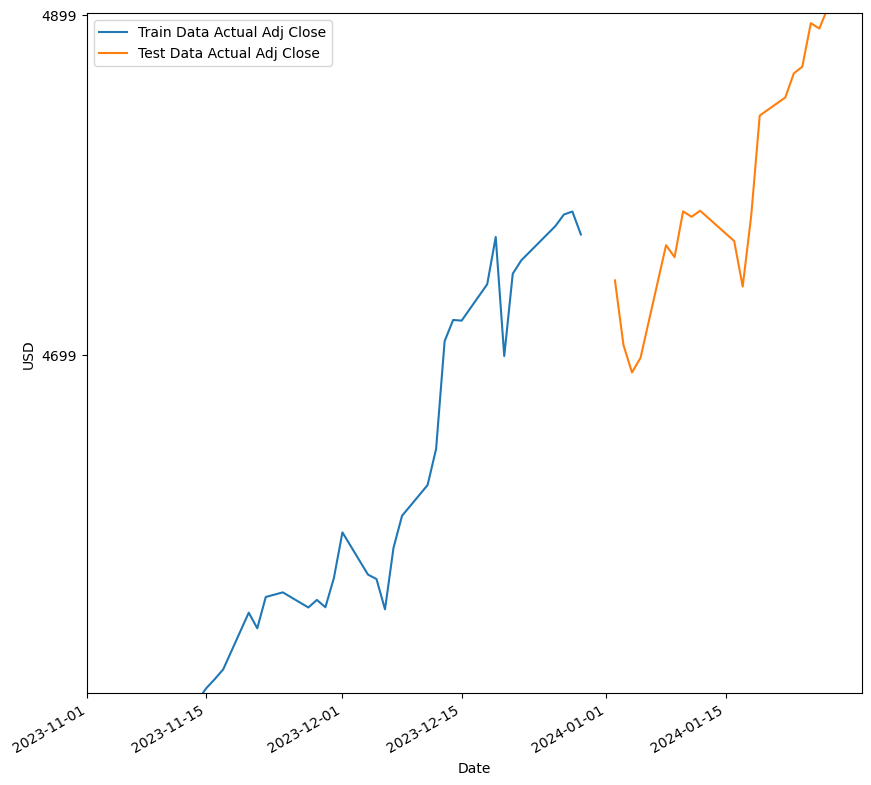

In [118]:
plt.figure(figsize=(10,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().yaxis.set_major_locator(mdates.DayLocator(interval=200))

plt.plot(trainingData.index, trainingData['Adj Close'], label='Train Data Actual Adj Close')
plt.plot(testingData.index, testingData['Adj Close'], label='Test Data Actual Adj Close')

start_date_zoom = pd.to_datetime('2023-11-01')
end_date_zoom = pd.to_datetime('2024-01-31')

plt.xlim(start_date_zoom, end_date_zoom)
plt.ylim(4500, 4900) 

plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


### Scaling

In [119]:
sc = MinMaxScaler(feature_range=(0,1))
trainDataScaled = sc.fit_transform(trainData.reshape(-1, 1))
testDataScaled = sc.fit_transform(testData.reshape(-1, 1))

### LSTM Implementation

Tive a ver online umas coisas, a ver se pintate. copiei e ajustei mas em principio e algo assim.

In [122]:
n_steps = 20

xTrain, yTrain = [], []

for i in range(n_steps, len(trainDataScaled)):
    xTrain.append(trainDataScaled[i-n_steps:i, 0])
    yTrain.append(trainDataScaled[i, 0])
      
xTrain, yTrain = np.array(xTrain), np.array(yTrain)
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))

#LSTM Model

model = Sequential()

#Layer 1
model.add(LSTM(units=200,return_sequences=True,input_shape=(xTrain.shape[1], 1)))
model.add(Dropout(0.2))
#Layer 2
model.add(LSTM(units=200,return_sequences=True))
model.add(Dropout(0.2))
#Layer 3
model.add(LSTM(units=200,return_sequences=True))
model.add(Dropout(0.2))
#Layer 4
model.add(LSTM(units=200, return_sequences=False))
model.add(Dropout(0.2))
#Layer 5
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error', metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
model.summary()

#Early stopping parameters to stop unnecessary training
earlyStopping = EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=15,
    mode='min',
    min_delta = 0.000001
)


I0000 00:00:1731434508.103662   20722 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-12 18:01:48.389765: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 200)        │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 200)        │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20, 200)        │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,124,201 (4.29 MB)

 Trainable params: 1,124,201 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

In [123]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [124]:
eval = model.evaluate(xTrain, yTrain)

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0701 - mean_absolute_error: 0.1879 - root_mean_squared_error: 0.2235


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0037 - mean_absolute_error: 0.0459 - root_mean_squared_error: 0.0577 - val_loss: 0.0494 - val_mean_absolute_error: 0.2107 - val_root_mean_squared_error: 0.2222
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 0.0230 - mean_absolute_error: 0.1322 - root_mean_squared_error: 0.1489 - val_loss: 0.1270 - val_mean_absolute_error: 0.3471 - val_root_mean_squared_error: 0.3563
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - loss: 0.0022 - mean_absolute_error: 0.0382 - root_mean_squared_error: 0.0453 - val_loss: 0.0358 - val_mean_absolute_error: 0.1730 - val_root_mean_squared_error: 0.1891
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - loss: 0.1469 - mean_absolute_error: 0.2247 - root_mean_squared_error: 0.3488 - val_loss: 0.0073 - val_mean_absolute_error: 0.0702 - val_root_mean_squared_error: 0.0855
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - loss: 0.0567 - mean_absolute_error: 0.2011 - root_mean_squ

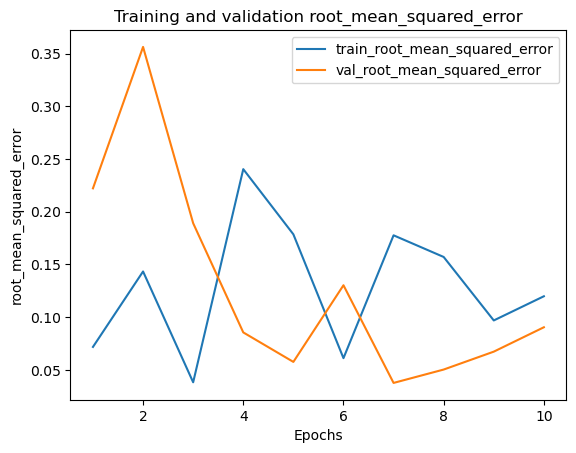

In [126]:
log = model.fit(
    xTrain,
    yTrain,
    epochs=10, # depois isto aumenta se mas o meu pc nao ta a colaborar
    batch_size=128, 
    validation_split = 0.25, 
    verbose=1, 
    callbacks=[earlyStopping], 
    shuffle=False)
plot_metric(log, 'root_mean_squared_error')


In [133]:
n_steps = 20

xTest = []
yTest = []

for i in range(n_steps, len(testDataScaled)):
    xTest.append(testDataScaled[i-n_steps:i, 0])
    yTest.append(testDataScaled[i, 0])
      
xTest, yTest = np.array(xTest), np.array(yTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))  

predictions = model.predict(xTest) #Prediction on Data using trained model
output = sc.inverse_transform(predictions) # ardeu

IndexError: tuple index out of range

In [134]:
predictions = model.predict(xTest) #Prediction on Data using trained model
output = sc.inverse_transform(predictions)


df1 = pd.DataFrame(testingData['Adj Close']).astype(float)
df1 = df1.iloc[:-20]
df1 = df1.reset_index(drop=False)

df2 = pd.DataFrame(output, columns = ['Pred Adj Close']).astype(float)


2024-11-12 18:09:28.412950: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


ValueError: math domain error

ardeu mas o objetivo era dar join dos dois datasets e depois dar plot de algo assim:

In [135]:
train = trainingData['Adj Close']
real = df['Adj Close']
pred = df['Pred Adj Close']
plt.figure(figsize=(10,10))
plt.title('SP500 Actual vs Predicted)
plt.xlabel('Date')
plt.ylabel('Adj Close Price ($)')
plt.plot(train)
plt.plot(real)
plt.plot(pred)
plt.legend(['Actual Pre-Training', 'Actual Post-Training','LSTM Prediction'], loc='lower right')
plt.xticks()
plt.show()
 # que mostrasse a diferenca entre as predictions com duas cores diferentes

KeyError: 'Pred Adj Close'

references:
- https://github.com/arogan178/lstm-stock-prediction-sp500/blob/master/LSTM-price-prediction-sp500.ipynb
- https://www.kaggle.com/code/yassinesfaihi/lstm-s-p500-stocks-time-series-forecasting
- chat gpt

  precisamos de reunir para ver como fazer nao me vou tar a matar mais.